In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('scripts/data/clean_data.csv', parse_dates=['date'])

df.head()


,date,home_team,away_team,home_score,away_score,round
0,2022-08-05,Crystal Palace FC,Arsenal FC,0,2,Matchday 1
1,2022-08-06,Fulham FC,Liverpool FC,2,2,Matchday 1
2,2022-08-06,Tottenham Hotspur FC,Southampton FC,4,1,Matchday 1
3,2022-08-06,Newcastle United FC,Nottingham Forest FC,2,0,Matchday 1
4,2022-08-06,Leeds United FC,Wolverhampton Wanderers FC,2,1,Matchday 1


In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        380 non-null    datetime64[ns]
 1   home_team   380 non-null    object        
 2   away_team   380 non-null    object        
 3   home_score  380 non-null    int64         
 4   away_score  380 non-null    int64         
 5   round       380 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 17.9+ KB


,date,home_score,away_score
count,380,380.000000,380.000000
mean,2023-01-08 15:05:41.052631296,1.634211,1.218421
min,2022-08-05 00:00:00,0.000000,0.000000
25%,2022-10-16 00:00:00,1.000000,0.000000
50%,2023-01-21 00:00:00,1.000000,1.000000
75%,2023-04-05 00:00:00,2.000000,2.000000
max,2023-05-28 00:00:00,9.000000,6.000000
std,NaN,1.419944,1.183518


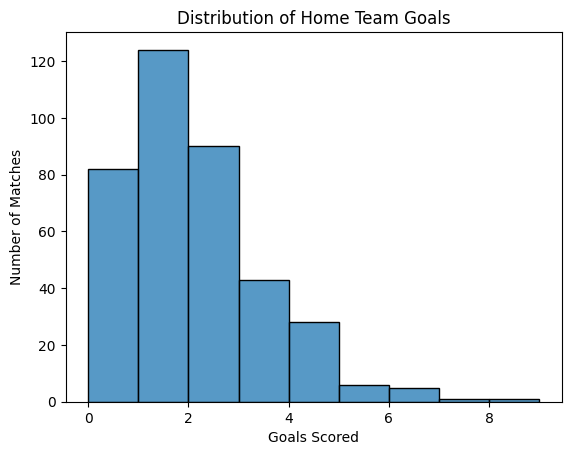

In [8]:
sns.histplot(df['home_score'], bins=range(0, 10), kde=False)
plt.title('Distribution of Home Team Goals')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Matches')
plt.show()


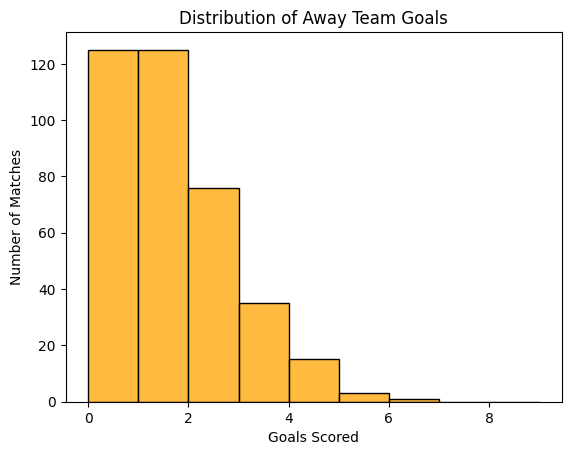

In [9]:
sns.histplot(df['away_score'], bins=range(0, 10), kde=False, color='orange')
plt.title('Distribution of Away Team Goals')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Matches')
plt.show()


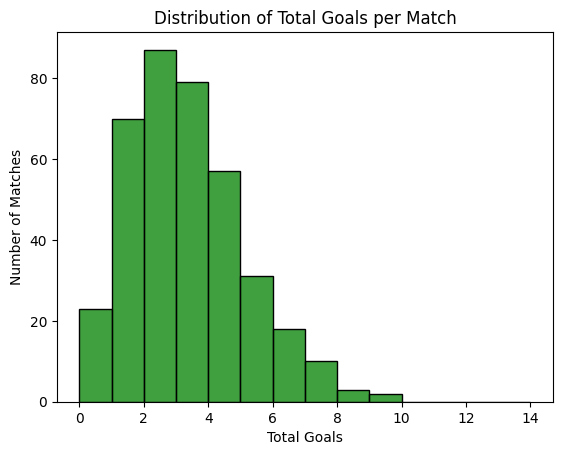

In [10]:
df['total_goals'] = df['home_score'] + df['away_score']

sns.histplot(df['total_goals'], bins=range(0, 15), kde=False, color='green')
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Number of Matches')
plt.show()


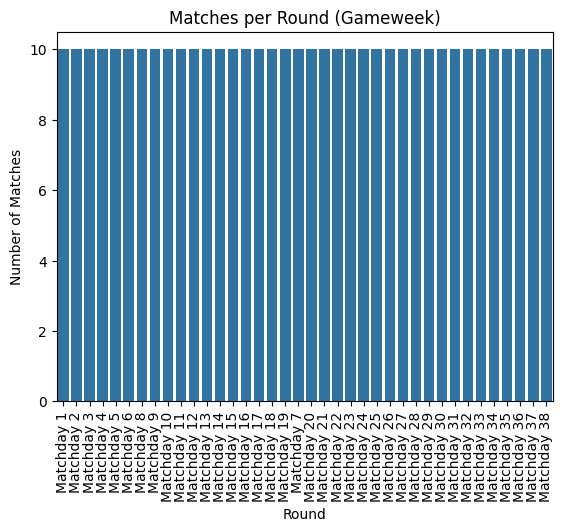

In [11]:
sns.countplot(x='round', data=df)
plt.xticks(rotation=90)
plt.title('Matches per Round (Gameweek)')
plt.xlabel('Round')
plt.ylabel('Number of Matches')
plt.show()


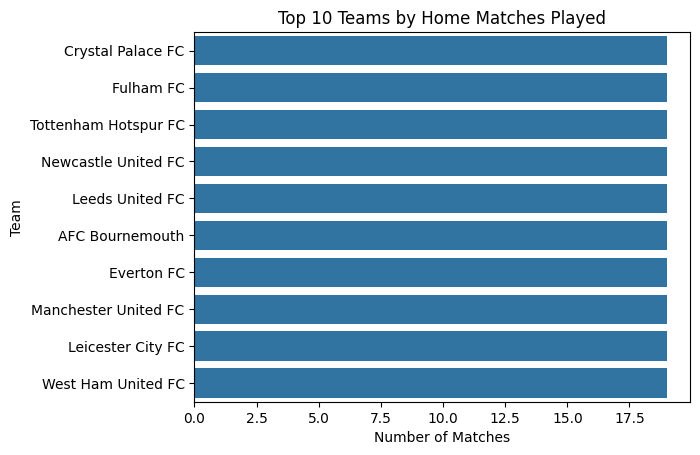

In [12]:
top_teams = df['home_team'].value_counts().head(10)
sns.barplot(x=top_teams.values, y=top_teams.index)
plt.title('Top 10 Teams by Home Matches Played')
plt.xlabel('Number of Matches')
plt.ylabel('Team')
plt.show()


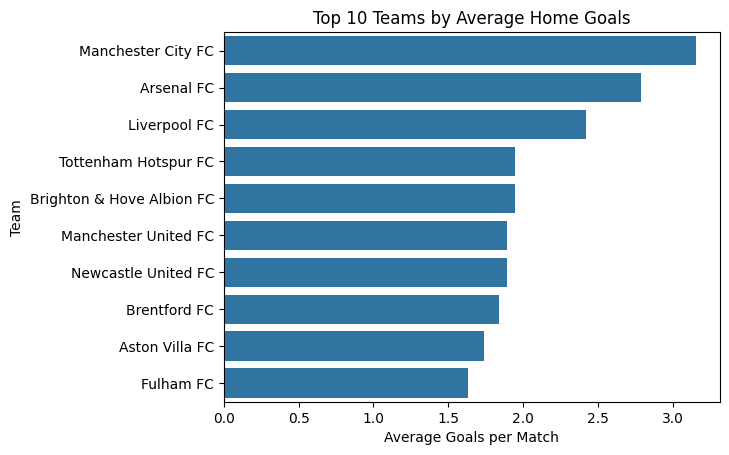

In [13]:
avg_home_goals = df.groupby('home_team')['home_score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_home_goals.values, y=avg_home_goals.index)
plt.title('Top 10 Teams by Average Home Goals')
plt.xlabel('Average Goals per Match')
plt.ylabel('Team')
plt.show()
